In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import pandas as pd
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LeakyReLU, Flatten

2021-12-23 01:24:48.202621: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-23 01:24:48.202642: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df= pd.read_csv('train.csv')
X = df.drop(columns = 'critical_temp')
y = df['critical_temp']
y = np.array(y)

#Filter the data
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]#IF THE CORRELATION IS HIGHER THAN 0.9 WE CAN DROP THE COLUMNS
df_copy = df.copy(deep=True)
df_copy.drop(columns=to_drop,inplace=True)
X = df_copy.drop(columns = ['critical_temp'])
y = df.critical_temp
y = np.array(y)
X = np.array(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [3]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [4]:
X.mean(axis=0)

array([ 2.13867917e-17, -2.08521219e-16, -4.38429229e-16, -8.28738176e-17,
        2.13867917e-17,  1.71094333e-16,  9.08938645e-17, -1.28320750e-16,
        1.06933958e-17, -2.03174521e-16, -5.34669791e-17, -4.70509416e-16,
       -5.77443375e-16,  7.80617895e-16,  6.41603750e-16, -5.88136770e-16,
        2.67334896e-16, -2.13867917e-16,  4.27735833e-16,  1.06933958e-17,
        0.00000000e+00,  8.44778270e-16,  5.40016489e-16, -1.59866268e-15,
        2.56641500e-16, -2.45948104e-16, -2.83374989e-16, -3.20801875e-17,
        1.22974052e-16,  2.13867917e-16,  1.06933958e-16,  1.20300703e-16,
       -1.71094333e-16, -1.49707542e-16,  0.00000000e+00, -3.31495271e-16,
        1.47034193e-16,  2.48621453e-16, -8.42104921e-17, -2.53299814e-16,
       -1.60400937e-16, -1.71094333e-16,  0.00000000e+00,  1.28320750e-16,
        9.62405624e-17, -2.67334896e-16,  0.00000000e+00,  1.17627354e-16,
        1.28320750e-16,  1.06933958e-17,  3.31495271e-16, -1.06933958e-17,
        1.28320750e-16,  

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 60)
pC = pca.fit_transform(X)
#X = pd.DataFrame(data = pC) 
X

array([[-0.0800575 ,  0.04673292, -0.45165095, ..., -0.40616628,
        -0.83837245, -0.52006971],
       [ 0.6147436 ,  0.17426938, -0.43207104, ..., -0.36235194,
        -0.42686578, -0.45082134],
       [-0.0800575 ,  0.04673292, -0.45097762, ..., -0.37695672,
        -0.83837245, -0.50330427],
       ...,
       [-1.46965972,  0.40792698,  0.67545689, ...,  1.75534096,
        -0.7001588 , -0.60141582],
       [-1.46965972,  0.40792698,  0.71984372, ...,  0.7432298 ,
        -0.7001588 , -0.46423977],
       [-0.77485861, -0.0030091 ,  0.41416385, ...,  0.32407265,
         1.18612097,  1.81314381]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Scaling data


In [7]:
#y_train=np.reshape(y_train, (-1,1))
#y_test=np.reshape(y_test, (-1,1))
#scaler_x = MinMaxScaler()
#print(scaler_x.fit(X_train))
#xtrain_scale=scaler_x.transform(X_train)
#print(scaler_x.fit(X_test))
#xval_scale=scaler_x.transform(X_test)

In [8]:
from tensorflow.keras.activations import swish, sigmoid

In [19]:
model = Sequential()
model.add(Dense(15, input_shape=(81,), activation=swish))
model.add(Dropout(0.))
model.add(Dense(150, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(50, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(75, activation=sigmoid))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "linear", kernel_initializer="normal", bias_initializer="normal"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                1230      
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               2400      
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                7550      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 75)               

In [23]:
model.compile(loss=tensorflow.keras.losses.MeanSquaredError(),
              metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
training = model.fit(X_train, y_train, batch_size=400, epochs=20, validation_split=0.1)

Epoch 1/20
36/36 [==============================] - 1s 9ms/step - loss: 1180.1906 - mean_absolute_error: 29.5703 - val_loss: 1214.3010 - val_mean_absolute_error: 29.9919
Epoch 2/20
36/36 [==============================] - 0s 7ms/step - loss: 1181.7096 - mean_absolute_error: 29.5413 - val_loss: 1214.2388 - val_mean_absolute_error: 29.9505
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 1175.1608 - mean_absolute_error: 29.4906 - val_loss: 1214.2400 - val_mean_absolute_error: 29.9046
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 1178.7889 - mean_absolute_error: 29.5015 - val_loss: 1214.2860 - val_mean_absolute_error: 29.8723
Epoch 5/20
36/36 [==============================] - 0s 7ms/step - loss: 1181.0869 - mean_absolute_error: 29.5036 - val_loss: 1214.3522 - val_mean_absolute_error: 29.8458
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: 1182.6542 - mean_absolute_error: 29.4698 - val_loss: 1214.4292 - val_mean_abso

In [21]:
def PlotLoss():
    plt.plot(training.history['loss'], label="train")
    plt.plot(training.history['val_loss'], label="validation")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

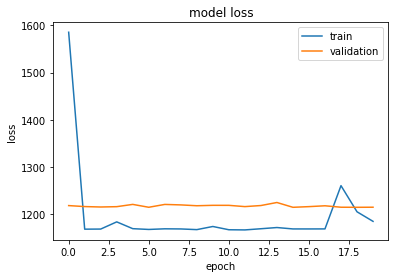

In [22]:
PlotLoss()

In [18]:
compare = pd.DataFrame(columns = ['predictions'], data = model.predict(X_train))
compare['true'] = y_train
compare

,predictions,true
0,33.32262,93.80
1,33.32262,18.40
2,33.32262,78.00
3,33.32262,87.50
4,33.32262,84.80
...,...,...
15942,33.32262,4.85
15943,33.32262,33.00
15944,33.32262,3.70
15945,33.32262,5.98
